In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
tf.random.set_seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def logit(z):
  return 1 / (1 + np.exp(-z))

그림 저장: sigmoid_saturation_plot


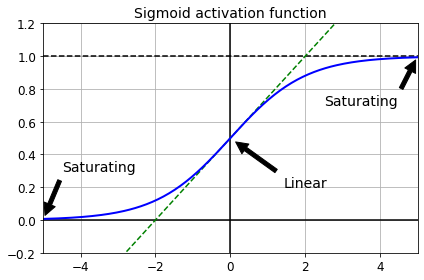

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), 'b-', linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2, mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=init)

In [7]:
def leaky_relu(z, alpha=0.01):
  return np.maximum(alpha*z, z)

그림 저장: leaky_relu_plot


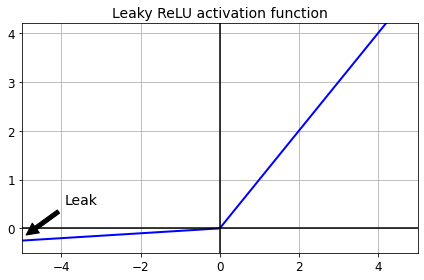

In [8]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [9]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [10]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4431872/4422102 [==============================] - 0s 0us/step


In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax"),
])

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5339 - accuracy: 0.8223 - val_loss: 0.5156 - val_accurac

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.3337 - accuracy: 0.6140 - val_loss: 0.8951 - val_accuracy: 0.7192
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8048 - accuracy: 0.7413 - val_loss: 0.7103 - val_accuracy: 0.7742
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6849 - accuracy: 0.7771 - val_loss: 0.6405 - val_accuracy: 0.7962
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6237 - accuracy: 0.7942 - val_loss: 0.5859 - val_accuracy: 0.8122
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5846 - accuracy: 0.8073 - val_loss: 0.5542 - val_accuracy: 0.8192
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5567 - accuracy: 0.8146 - val_loss: 0.5315 - val_accuracy: 0.8246
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5352 - accuracy: 0.8205 - val_loss: 0.5121 - val_accuracy:

In [16]:
def elu(z, alpha=1):
  return np.where(z < 0, alpha * (np.exp(z) - 1), z)

그림 저장: elu_plot


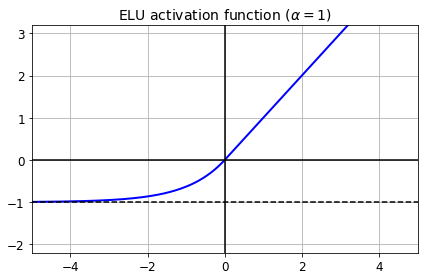

In [17]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [18]:
keras.layers.Dense(10, activation="elu")

In [19]:
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [20]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
  return scale * elu(z, alpha)

그림 저장: selu_plot


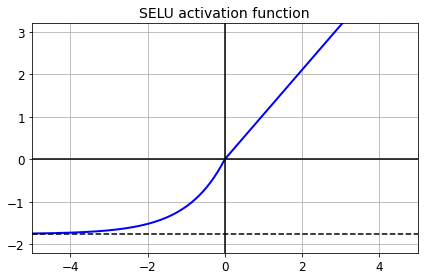

In [21]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

In [22]:
Z = np.random.normal(size=(500, 100))
for layer in range(1000):
  W = np.random.normal(size=(100, 100), scale=np.sqrt(1/100))
  Z = selu(np.dot(Z, W))
  means = np.mean(Z, axis=0).mean()
  stds = np.std(Z, axis=0).mean()
  if layer % 100 == 0:
    print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [23]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
  model.add(keras.layers.Dense(100, activation="selu",
                               kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [26]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [27]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 41s 21ms/step - loss: 1.4834 - accuracy: 0.4106 - val_loss: 1.0700 - val_accuracy: 0.6034
Epoch 2/5
1719/1719 [==============================] - 35s 20ms/step - loss: 0.9046 - accuracy: 0.6517 - val_loss: 0.9159 - val_accuracy: 0.6582
Epoch 3/5
1719/1719 [==============================] - 37s 22ms/step - loss: 0.7595 - accuracy: 0.7126 - val_loss: 0.6877 - val_accuracy: 0.7454
Epoch 4/5
1719/1719 [==============================] - 35s 21ms/step - loss: 0.6406 - accuracy: 0.7610 - val_loss: 0.5900 - val_accuracy: 0.7856
Epoch 5/5
1719/1719 [==============================] - 35s 20ms/step - loss: 0.5779 - accuracy: 0.7853 - val_loss: 0.5423 - val_accuracy: 0.8046


In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 65s 36ms/step - loss: 1.9087 - accuracy: 0.2213 - val_loss: 1.5282 - val_accuracy: 0.3556
Epoch 2/5
1719/1719 [==============================] - 55s 32ms/step - loss: 1.2132 - accuracy: 0.4781 - val_loss: 1.0156 - val_accuracy: 0.5554
Epoch 3/5
1719/1719 [==============================] - 35s 20ms/step - loss: 0.9750 - accuracy: 0.5957 - val_loss: 0.8222 - val_accuracy: 0.6802
Epoch 4/5
1719/1719 [==============================] - 49s 29ms/step - loss: 0.9157 - accuracy: 0.6347 - val_loss: 0.8800 - val_accuracy: 0.6682
Epoch 5/5
1719/1719 [==============================] - 50s 29ms/step - loss: 0.8998 - accuracy: 0.6363 - val_loss: 1.6367 - val_accuracy: 0.2634


In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_212 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_213 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [30]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8510 - accuracy: 0.7133 - val_loss: 0.5542 - val_accuracy: 0.8122
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5725 - accuracy: 0.8023 - val_loss: 0.4771 - val_accuracy: 0.8328
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5174 - accuracy: 0.8202 - val_loss: 0.4434 - val_accuracy: 0.8398
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4796 - accuracy: 0.8315 - val_loss: 0.4201 - val_accuracy: 0.8476
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4561 - accuracy: 0.8394 - val_loss: 0.4040 - val_accuracy: 0.8552
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4386 - accuracy: 0.8451 - val_loss: 0.3922 - val_accuracy: 0.8614
Epoch 7/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4256 - accuracy: 0.8497 - val_loss: 0.3799 - val_ac

In [32]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 16s 8ms/step - loss: 1.0374 - accuracy: 0.6818 - val_loss: 0.6785 - val_accuracy: 0.7936
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6760 - accuracy: 0.7811 - val_loss: 0.5537 - val_accuracy: 0.8226
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5919 - accuracy: 0.8043 - val_loss: 0.4991 - val_accuracy: 0.8358
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5417 - accuracy: 0.8186 - val_loss: 0.4659 - val_accuracy: 0.8440
Epoch 5/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.5086 - accuracy: 0.8277 - val_loss: 0.4440 - val_accuracy: 0.8520
Epoch 6/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4884 - accuracy: 0.8335 - val_loss: 0.4259 - val_accuracy: 0.8554
Epoch 7/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4703 - accuracy: 0.8401 - val_loss: 0.4131 - val_

In [33]:
optimizer_value = keras.optimizers.SGD(clipvalue=1.0)
optimizer_norm = keras.optimizers.SGD(clipnorm=1.0)

In [34]:
def split_dataset(X, y):
  y_5_or_6 = (y == 5) | (y == 6)
  y_A = y[~y_5_or_6]
  y_A[y_A > 6] -= 2
  y_B = (y[y_5_or_6] == 6).astype(np.float32)
  return ((X[~y_5_or_6], y_A),
          (X[y_5_or_6], y_B))
  
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [35]:
X_train_A.shape

(43986, 28, 28)

In [36]:
X_train_B.shape

(200, 28, 28)

In [37]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [38]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [39]:
tf.random.set_seed(42)
np.random.seed(42)

In [40]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
  model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [41]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [42]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 11s 7ms/step - loss: 0.5927 - accuracy: 0.8104 - val_loss: 0.3896 - val_accuracy: 0.8667
Epoch 2/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3289 - val_accuracy: 0.8824
Epoch 3/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3170 - accuracy: 0.8896 - val_loss: 0.3014 - val_accuracy: 0.8989
Epoch 4/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2973 - accuracy: 0.8975 - val_loss: 0.2894 - val_accuracy: 0.9021
Epoch 5/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2835 - accuracy: 0.9022 - val_loss: 0.2776 - val_accuracy: 0.9066
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2729 - accuracy: 0.9061 - val_loss: 0.2735 - val_accuracy: 0.9071
Epoch 7/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2641 - accuracy: 0.9093 - val_loss: 0.2720 - val_accuracy

In [43]:
model_A.save("my_model_A.h5")

In [44]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
  model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [45]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [46]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 3s 173ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 42ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 35ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 25ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 21ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 18ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 19ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [==========

In [47]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_224 (Dense)           (None, 300)               235500    
                                                                 
 dense_225 (Dense)           (None, 100)               30100     
                                                                 
 dense_226 (Dense)           (None, 50)                5050      
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 50)                2550      
                                                                 
 dense_229 (Dense)           (None, 1)                

In [48]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [49]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [50]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [51]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 46ms/step - loss: 0.2632 - accuracy: 0.9400 - val_loss: 0.2779 - val_accuracy: 0.9270
Epoch 2/4
7/7 [==============================] - 0s 18ms/step - loss: 0.2536 - accuracy: 0.9400 - val_loss: 0.2685 - val_accuracy: 0.9300
Epoch 3/4
7/7 [==============================] - 0s 17ms/step - loss: 0.2444 - accuracy: 0.9400 - val_loss: 0.2599 - val_accuracy: 0.9351
Epoch 4/4
7/7 [==============================] - 0s 19ms/step - loss: 0.2360 - accuracy: 0.9400 - val_loss: 0.2518 - val_accuracy: 0.9381
Epoch 1/16
7/7 [==============================] - 1s 46ms/step - loss: 0.2113 - accuracy: 0.9450 - val_loss: 0.2040 - val_accuracy: 0.9635
Epoch 2/16
7/7 [==============================] - 0s 17ms/step - loss: 0.1691 - accuracy: 0.9550 - val_loss: 0.1719 - val_accuracy: 0.9716
Epoch 3/16
7/7 [==============================] - 0s 18ms/step - loss: 0.1404 - accuracy: 0.9700 - val_loss: 0.1492 - val_accuracy: 0.9807
Epoch 4/16
7/7 [===============

In [52]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [53]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9940


[0.056372594088315964, 0.9940000176429749]

In [54]:
(100 - 97.05) / (100 - 99.40)

4.916666666666718

In [55]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [56]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [57]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

In [58]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [59]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [60]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [61]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [62]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [63]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax"),
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [64]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4898 - accuracy: 0.8265 - val_loss: 0.4063 - val_accuracy: 0.8608
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3792 - accuracy: 0.8655 - val_loss: 0.3729 - val_accuracy: 0.8718
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3467 - accuracy: 0.8774 - val_loss: 0.3747 - val_accuracy: 0.8720
Epoch 4/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3259 - accuracy: 0.8845 - val_loss: 0.3512 - val_accuracy: 0.8780
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3107 - accuracy: 0.8897 - val_loss: 0.3449 - val_accuracy: 0.8788
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2972 - accuracy: 0.8940 - val_loss: 0.3419 - val_accuracy: 0.8844
Epoch 7/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2871 - accuracy: 0.8981 - val_loss: 0.3379 - val_accuracy

In [65]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

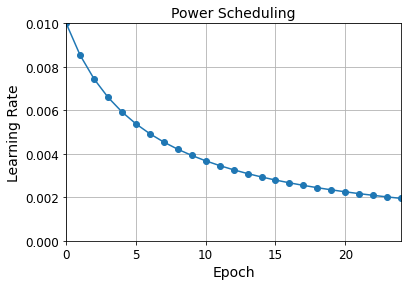

In [66]:
plt.plot(epochs, lrs, "o-")
plt.axis([0, n_epochs -1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [67]:
def exponential_decay_fn(epoch):
  return 0.01 * 0.1 ** (epoch / 20)

In [68]:
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1 ** (epoch / s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [69]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 19s 11ms/step - loss: 0.8566 - accuracy: 0.7552 - val_loss: 0.8053 - val_accuracy: 0.7670 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 17s 10ms/step - loss: 0.7229 - accuracy: 0.7798 - val_loss: 0.7611 - val_accuracy: 0.7492 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 13s 8ms/step - loss: 0.5840 - accuracy: 0.8172 - val_loss: 0.7166 - val_accuracy: 0.7696 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5428 - accuracy: 0.8329 - val_loss: 0.5661 - val_accuracy: 0.8382 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4897 - accuracy: 0.8467 - val_loss: 0.7592 - val_accuracy: 0.7672 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4553 - accuracy: 0.8578 - val_loss: 0.4661 - val_accuracy: 0.8608 - lr: 0.0056
Epoch 7/25
1719/1719 [============================

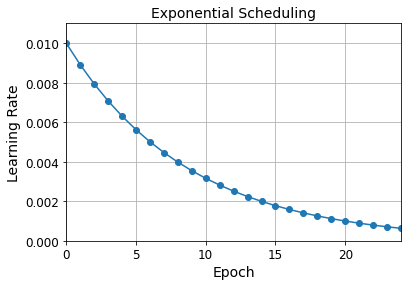

In [70]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [71]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [72]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # 노트: 에포크마다 `batch` 매개변수가 재설정됩니다
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # 20 에포크 동안 스텝 횟수 (배치 크기 = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 17s 9ms/step - loss: 0.8082 - accuracy: 0.7620 - val_loss: 0.9582 - val_accuracy: 0.7690 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 15s 9ms/step - loss: 0.6669 - accuracy: 0.7979 - val_loss: 0.5285 - val_accuracy: 0.8336 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 16s 9ms/step - loss: 0.6080 - accuracy: 0.8151 - val_loss: 0.8994 - val_accuracy: 0.7156 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 16s 9ms/step - loss: 0.5005 - accuracy: 0.8413 - val_loss: 0.4545 - val_accuracy: 0.8598 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4673 - accuracy: 0.8531 - val_loss: 0.4943 - val_accuracy: 0.8620 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4218 - accuracy: 0.8659 - val_loss: 0.4853 - val_accuracy: 0.8660 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================

In [73]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

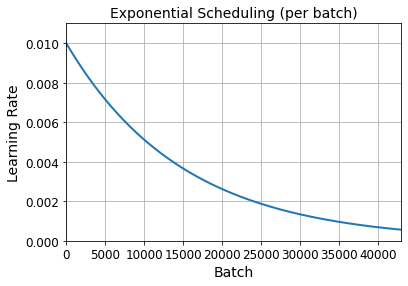

In [74]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

In [75]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [76]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [77]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8369 - accuracy: 0.7566 - val_loss: 0.8026 - val_accuracy: 0.7464 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.8054 - accuracy: 0.7678 - val_loss: 0.8051 - val_accuracy: 0.7840 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9554 - accuracy: 0.7198 - val_loss: 1.5560 - val_accuracy: 0.5516 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 13s 7ms/step - loss: 1.0785 - accuracy: 0.6704 - val_loss: 0.9651 - val_accuracy: 0.6364 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 13s 7ms/step - loss: 1.0249 - accuracy: 0.6683 - val_loss: 1.1693 - val_accuracy: 0.6470 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7260 - accuracy: 0.7377 - val_loss: 0.6760 - val_accuracy: 0.7602 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================

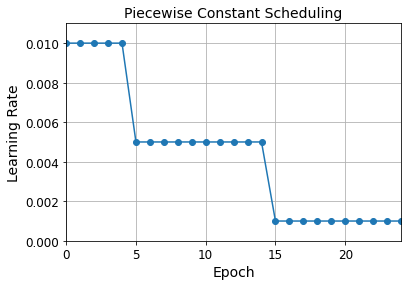

In [78]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [79]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5847 - accuracy: 0.8063 - val_loss: 0.4836 - val_accuracy: 0.8554 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4845 - accuracy: 0.8426 - val_loss: 0.5464 - val_accuracy: 0.8384 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5061 - accuracy: 0.8433 - val_loss: 0.4986 - val_accuracy: 0.8588 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5076 - accuracy: 0.8465 - val_loss: 0.5224 - val_accuracy: 0.8294 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5189 - accuracy: 0.8471 - val_loss: 0.4931 - val_accuracy: 0.8520 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5049 - accuracy: 0.8533 - val_loss: 0.5794 - val_accuracy: 0.8496 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 7s

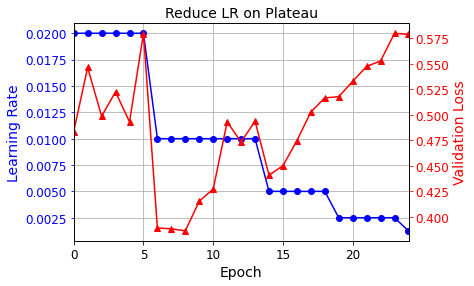

In [80]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [81]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4880 - accuracy: 0.8290 - val_loss: 0.4023 - val_accuracy: 0.8598
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3799 - accuracy: 0.8660 - val_loss: 0.3697 - val_accuracy: 0.8686
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3459 - accuracy: 0.8770 - val_loss: 0.3684 - val_accuracy: 0.8686
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3239 - accuracy: 0.8847 - val_loss: 0.3463 - val_accuracy: 0.8750
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3079 - accuracy: 0.8903 - val_loss: 0.3412 - val_accuracy: 0.8754
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2936 - accuracy: 0.8950 - val_loss: 0.3390 - val_accuracy: 0.8780
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2831 - accuracy: 0.8999 - val_loss: 0.3333 - val_accuracy:

In [82]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

In [83]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_epoch_begin(self, epoch, logs=None):
        self.prev_loss = 0
    def on_batch_end(self, batch, logs):
        batch_loss = logs["loss"] * (batch + 1) - self.prev_loss * batch
        self.prev_loss = logs["loss"]
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [84]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 4s 8ms/step - loss: nan - accuracy: 0.3871


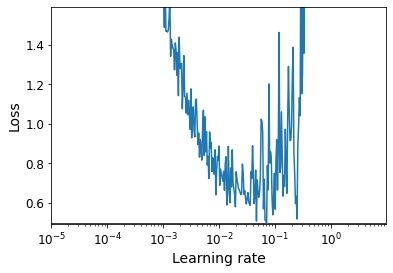

In [85]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [86]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [87]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 4s 8ms/step - loss: 0.6504 - accuracy: 0.7764 - val_loss: 0.4928 - val_accuracy: 0.8370
Epoch 2/25
430/430 [==============================] - 3s 8ms/step - loss: 0.4573 - accuracy: 0.8409 - val_loss: 0.4324 - val_accuracy: 0.8538
Epoch 3/25
430/430 [==============================] - 6s 13ms/step - loss: 0.4113 - accuracy: 0.8562 - val_loss: 0.4119 - val_accuracy: 0.8588
Epoch 4/25
430/430 [==============================] - 3s 8ms/step - loss: 0.3822 - accuracy: 0.8651 - val_loss: 0.3838 - val_accuracy: 0.8650
Epoch 5/25
430/430 [==============================] - 3s 7ms/step - loss: 0.3625 - accuracy: 0.8725 - val_loss: 0.3744 - val_accuracy: 0.8638
Epoch 6/25
430/430 [==============================] - 3s 8ms/step - loss: 0.3440 - accuracy: 0.8785 - val_loss: 0.3703 - val_accuracy: 0.8754
Epoch 7/25
430/430 [==============================] - 3s 8ms/step - loss: 0.3311 - accuracy: 0.8813 - val_loss: 0.3593 - val_accuracy: 0.8778
Epoch

430/430 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.7190


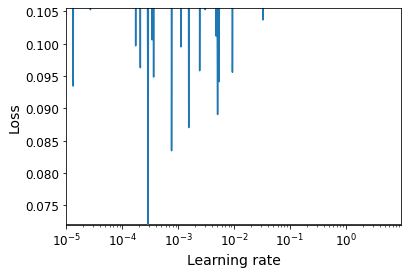

In [88]:
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [89]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for l1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both l1 and l2 regularization, with factors 0.1 and 0.01 respectively

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 16s 8ms/step - loss: 1.6021 - accuracy: 0.8126 - val_loss: 0.7170 - val_accuracy: 0.8316
Epoch 2/2
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7181 - accuracy: 0.8284 - val_loss: 0.6841 - val_accuracy: 0.8402


In [91]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 17s 10ms/step - loss: 1.6624 - accuracy: 0.8110 - val_loss: 0.7198 - val_accuracy: 0.8294
Epoch 2/2
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7200 - accuracy: 0.8268 - val_loss: 0.6862 - val_accuracy: 0.8360


In [92]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 15s 8ms/step - loss: 0.5649 - accuracy: 0.8060 - val_loss: 0.3732 - val_accuracy: 0.8704
Epoch 2/2
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4208 - accuracy: 0.8458 - val_loss: 0.3524 - val_accuracy: 0.8702


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

In [94]:
model.evaluate(X_test_scaled, y_test)
model.evaluate(X_train_scaled, y_train)
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 8s 5ms/step - loss: 0.4167 - accuracy: 0.8450


In [ ]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [ ]:
np.round(model.predict(X_test_scaled[:1]), 2)

In [97]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.7 , 0.  , 0.19]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.67, 0.  , 0.24, 0.  , 0.09]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.13, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.29, 0.  , 0.62]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.15, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.38, 0.  , 0.61]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.59, 0.  , 0.31]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.21, 0.  , 0.56]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.65, 0.  , 0.26]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.5 , 0.  , 0.45]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.05, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.42, 0.  , 0.35]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.16, 0.  , 0.64]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.12, 0.  , 0

In [ ]:
y_probas

In [99]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.26, 0.  , 0.6 ]],
      dtype=float32)

In [100]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.25, 0.  , 0.31]],
      dtype=float32)

In [101]:
y_pred = np.argmax(y_proba, axis=1)

In [102]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8655

In [103]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [104]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [105]:
mc_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaDr  (None, 784)              0         
 opout)                                                          
                                                                 
 dense_263 (Dense)           (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_264 (Dense)           (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlpha  (None, 100)            

In [106]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [107]:
mc_model.set_weights(model.get_weights())

In [108]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.23, 0.  , 0.65]],
      dtype=float32)

In [109]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))


In [110]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4754 - accuracy: 0.8337 - val_loss: 0.3869 - val_accuracy: 0.8634
Epoch 2/2
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3547 - accuracy: 0.8709 - val_loss: 0.3879 - val_accuracy: 0.8618


In [136]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [137]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
  model.add(keras.layers.Dense(100, activation="elu",
                               kernel_initializer="he_normal"))

In [138]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [139]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [140]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [141]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # 모델을 훈련할 때마다 증가시킴
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [142]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 30s 18ms/step - loss: 3.9882 - accuracy: 0.1750 - val_loss: 2.1041 - val_accuracy: 0.2368
Epoch 2/100
1407/1407 [==============================] - 22s 15ms/step - loss: 2.0415 - accuracy: 0.2551 - val_loss: 2.1067 - val_accuracy: 0.2406
Epoch 3/100
1407/1407 [==============================] - 22s 15ms/step - loss: 1.9307 - accuracy: 0.2952 - val_loss: 1.9628 - val_accuracy: 0.2804
Epoch 4/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.8526 - accuracy: 0.3225 - val_loss: 1.8137 - val_accuracy: 0.3412
Epoch 5/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.7864 - accuracy: 0.3496 - val_loss: 1.8074 - val_accuracy: 0.3374
Epoch 6/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.7375 - accuracy: 0.3695 - val_loss: 1.7179 - val_accuracy: 0.3798
Epoch 7/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.6983 - accuracy: 0.3864 - val_loss: 1

In [143]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 4ms/step - loss: 1.5154 - accuracy: 0.4812


[1.515366554260254, 0.4812000095844269]

In [144]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # 모델을 훈련할 때마다 증가시킴
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 51s 26ms/step - loss: 1.8413 - accuracy: 0.3402 - val_loss: 1.6842 - val_accuracy: 0.4020
Epoch 2/100
1407/1407 [==============================] - 38s 27ms/step - loss: 1.6668 - accuracy: 0.4061 - val_loss: 1.5830 - val_accuracy: 0.4306
Epoch 3/100
1407/1407 [==============================] - 36s 26ms/step - loss: 1.5999 - accuracy: 0.4310 - val_loss: 1.5545 - val_accuracy: 0.4324
Epoch 4/100
1407/1407 [==============================] - 39s 28ms/step - loss: 1.5471 - accuracy: 0.4491 - val_loss: 1.5217 - val_accuracy: 0.4604
Epoch 5/100
1407/1407 [==============================] - 37s 26ms/step - loss: 1.5047 - accuracy: 0.4664 - val_loss: 1.4417 - val_accuracy: 0.4806
Epoch 6/100
1407/1407 [==============================] - 37s 26ms/step - loss: 1.4668 - accuracy: 0.4791 - val_loss: 1.4049 - val_accuracy: 0.4938
Epoch 7/100
1407/1407 [==============================] - 40s 28ms/step - loss: 1.4333 - accuracy: 0.4912 - val_loss: 1

[1.3074175119400024, 0.5361999869346619]

In [145]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 # 모델을 훈련할 때마다 증가시킴
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 32s 17ms/step - loss: 1.9176 - accuracy: 0.3125 - val_loss: 1.8557 - val_accuracy: 0.3402
Epoch 2/100
1407/1407 [==============================] - 23s 16ms/step - loss: 1.7046 - accuracy: 0.3943 - val_loss: 1.7404 - val_accuracy: 0.3784
Epoch 3/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.6085 - accuracy: 0.4348 - val_loss: 1.7106 - val_accuracy: 0.3906
Epoch 4/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5486 - accuracy: 0.4558 - val_loss: 1.6228 - val_accuracy: 0.4376
Epoch 5/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.4902 - accuracy: 0.4764 - val_loss: 1.6360 - val_accuracy: 0.4288
Epoch 6/100
1407/1407 [==============================] - 22s 15ms/step - loss: 1.4453 - accuracy: 0.4922 - val_loss: 1.5338 - val_accuracy: 0.4578
Epoch 7/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.4072 - accuracy: 0.5069 - val_loss: 1

[1.4628735780715942, 0.49779999256134033]

In [146]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)
run_index = 1 # 모델을 훈련할 때마다 증가시킴
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 30s 17ms/step - loss: 1.9022 - accuracy: 0.3237 - val_loss: 1.7034 - val_accuracy: 0.3894
Epoch 2/100
1407/1407 [==============================] - 23s 16ms/step - loss: 1.6717 - accuracy: 0.4070 - val_loss: 1.7202 - val_accuracy: 0.4034
Epoch 3/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.5773 - accuracy: 0.4488 - val_loss: 1.6244 - val_accuracy: 0.4290
Epoch 4/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.5122 - accuracy: 0.4718 - val_loss: 1.5603 - val_accuracy: 0.4674
Epoch 5/100
1407/1407 [==============================] - 26s 19ms/step - loss: 1.4565 - accuracy: 0.4900 - val_loss: 1.6625 - val_accuracy: 0.4594
Epoch 6/100
1407/1407 [==============================] - 23s 17ms/step - loss: 1.4054 - accuracy: 0.5113 - val_loss: 1.5159 - val_accuracy: 0.4774
Epoch 7/100
1407/1407 [==============================] - 23s 16ms/step - loss: 1.3612 - accuracy: 0.5250 - val_loss: 1

[1.4959455728530884, 0.483599990606308]

In [147]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [148]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [149]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [150]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.4836

352/352 [==============================] - 8s 21ms/step - loss: nan - accuracy: 0.1379


(9.999999747378752e-06,
 9.615227699279785,
 2.051936626434326,
 3.6025207383292064)

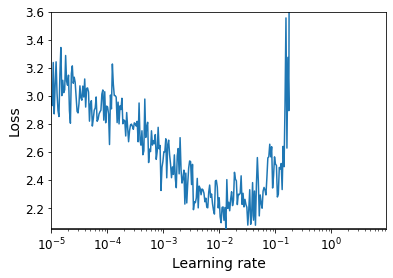

In [151]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [152]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

n_epochs = 15
onecycle = OneCycleScheduler(len(X_train_scaled) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 8s 19ms/step - loss: 2.0532 - accuracy: 0.2864 - val_loss: 1.7470 - val_accuracy: 0.3846
Epoch 2/15
352/352 [==============================] - 6s 18ms/step - loss: 1.7630 - accuracy: 0.3765 - val_loss: 1.6308 - val_accuracy: 0.4276
Epoch 3/15
352/352 [==============================] - 7s 19ms/step - loss: 1.6147 - accuracy: 0.4256 - val_loss: 1.6498 - val_accuracy: 0.4268
Epoch 4/15
352/352 [==============================] - 6s 18ms/step - loss: 1.5412 - accuracy: 0.4525 - val_loss: 1.6208 - val_accuracy: 0.4324
Epoch 5/15
352/352 [==============================] - 7s 18ms/step - loss: 1.4883 - accuracy: 0.4734 - val_loss: 1.6611 - val_accuracy: 0.4428
Epoch 6/15
352/352 [==============================] - 9s 25ms/step - loss: 1.4454 - accuracy: 0.4866 - val_loss: 1.5653 - val_accuracy: 0.4586
Epoch 7/15
352/352 [==============================] - 6s 18ms/step - loss: 1.4107 - accuracy: 0.4988 - val_loss: 1.5673 - val_accuracy: 0.4630